In [1]:
import torch
import pandas as pd
from torch import optim
import numpy as np

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")

In [3]:
spaceship.dropna(how = 'any', inplace = True)

# Step 1: Extract the first letter (before "/")
spaceship['Cabin'] = spaceship['Cabin'].str[0]

spaceship.drop(columns = ['PassengerId', 'Name'], inplace = True)

# Convert non-numerical columns to dummies
df_dummies = pd.get_dummies(spaceship, drop_first=True)

# Convert boolean columns to integers (0 or 1)
df_dummies = df_dummies.astype(int)

df_dummies

Age  RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Transported  \
0      39            0          0             0     0       0            0   
1      24          109          9            25   549      44            1   
2      58           43       3576             0  6715      49            0   
3      33            0       1283           371  3329     193            0   
4      16          303         70           151   565       2            1   
...   ...          ...        ...           ...   ...     ...          ...   
8688   41            0       6819             0  1643      74            0   
8689   18            0          0             0     0       0            0   
8690   26            0          0          1872     1       0            1   
8691   32            0       1049             0   353    3235            0   
8692   44          126       4688             0     0      12            1   

      HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  Cabin_B  Cabin_C  \
0                     1                0               0        1        0   
1                     0                0               0        0        0   
2                     1                0               0        0        0   
3                     1                0               0        0        0   
4                     0                0               0        0        0   
...                 ...              ...             ...      ...      ...   
8688                  1                0               0        0        0   
8689                  0                0               1        0        0   
8690                  0                0               0        0        0   
8691                  1                0               0        0        0   
8692                  1                0               0        0        0   

      Cabin_D  Cabin_E  Cabin_F  Cabin_G  Cabin_T  Destination_PSO J318.5-22  \
0           0        0        0        0        0                          0   
1           0        0        1        0        0                          0   
2           0        0        0        0        0                          0   
3           0        0        0        0        0                          0   
4           0        0        1        0        0                          0   
...       ...      ...      ...      ...      ...                        ...   
8688        0        0        0        0        0                          0   
8689        0        0        0        1        0                          1   
8690        0        0        0        1        0                          0   
8691        0        1        0        0        0                          0   
8692        0        1        0        0        0                          0   

      Destination_TRAPPIST-1e  VIP_True  
0                           1         0  
1                           1         0  
2                           1         1  
3                           1         0  
4                           1         0  
...                       ...       ...  
8688                        0         1  
8689                        0         0  
8690                        1         0  
8691                        0         0  
8692                        1         0  

[6606 rows x 20 columns]

In [7]:
from sklearn.model_selection import train_test_split

features = df_dummies.drop(columns = ['Transported'])
target = df_dummies['Transported']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [8]:
y_train.shape

(5284,)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train = np.array(y_train)
y_test = np.array(y_test)


y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

### Model Creation

In [14]:
features.shape

(6606, 19)

In [16]:
import torch.nn as nn
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size,hidden_size1),
                                     nn.ReLU(),
                                    nn.Linear(hidden_size1,hidden_size2),
                                    nn.ReLU(),
                                    nn.Linear(hidden_size2, output_size),
                                    nn.Sigmoid())
    def forward(self, x):
        return self.network(x)

In [18]:
input_size = 19
hidden_size1 = 12
hidden_size2 = 12
output_size = 1

model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

In [20]:
# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 1000
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [50/1000], Loss: 0.6519
Epoch [100/1000], Loss: 0.5557
Epoch [150/1000], Loss: 0.4539
Epoch [200/1000], Loss: 0.4238
Epoch [250/1000], Loss: 0.4126
Epoch [300/1000], Loss: 0.4054
Epoch [350/1000], Loss: 0.4000
Epoch [400/1000], Loss: 0.3959
Epoch [450/1000], Loss: 0.3930
Epoch [500/1000], Loss: 0.3910
Epoch [550/1000], Loss: 0.3894
Epoch [600/1000], Loss: 0.3880
Epoch [650/1000], Loss: 0.3869
Epoch [700/1000], Loss: 0.3858
Epoch [750/1000], Loss: 0.3850
Epoch [800/1000], Loss: 0.3841
Epoch [850/1000], Loss: 0.3832
Epoch [900/1000], Loss: 0.3821
Epoch [950/1000], Loss: 0.3812
Epoch [1000/1000], Loss: 0.3803


### Model Evaluation

Test Loss: 0.4082


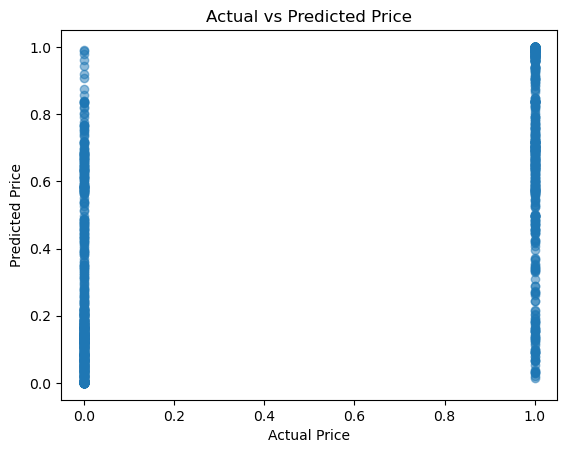

In [26]:
model.eval()  # This sets the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plotting our results
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions.numpy(), alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [34]:
import numpy as np
from sklearn.metrics import accuracy_score

# Convert predictions to binary (0 or 1)
binary_predictions = np.where(predictions >= 0.5, 1, 0)

# Compute accuracy
accuracy = accuracy_score(y_test, binary_predictions)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8048
